<a href="https://colab.research.google.com/github/angelomarcelino/machine_learning/blob/main/q1_Activation_Funcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Questão 1

O modelo de neurônio artificial de Mc-Culloch-Pitts faz uso da função de ativação para resposta do neurônio artificial. As funções: Sigmoide (ou função logística), Tangente Sigmoide (tangente hiperbólica) são normalmente utilizadas nas redes neurais perceptrons de múltiplas camadas com arquiteturas de poucas camada. A função ReLu (retificador linear) é normalmente utilizadas em redes Deep Learning. Segue abaixo as expressões matemáticas
de cada uma:

$\varphi(\nu) = \dfrac{1}{1+\text{exp}(-a\nu)}$ (sigmoide)

$\varphi(\nu) = \dfrac{1-\text{exp}(-a\nu)}{1+\text{exp}(-a\nu)} = \text{tanh}(\dfrac{a\nu}{2})$ (tangsigmoide)
    
$\varphi(\nu) = \text{max}(0,\nu)$ (Re-Lu)


#### Faça uma análise comparativa de cada uma destas funções e do gradiente delas em função da variação do potencial de ativação $\nu$.

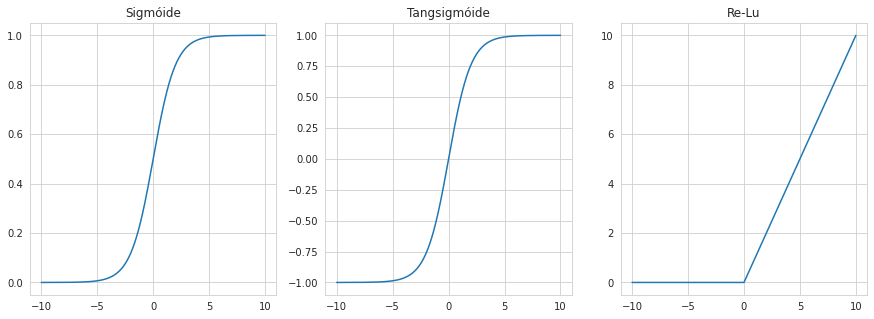

In [41]:
nu = np.linspace(-10,10,1000)

def sig(x, a=1):
    return 1/(1+np.exp(-a*x))

def tangsig(x, a=1):
    return (1-np.exp(-a*x))/(1+np.exp(-a*x))

def relu(x):
    return [ i if i > 0 else 0 for i in x ]

funcs = {
    "Sigmóide": sig(nu),
    "Tangsigmóide": tangsig(nu),
    "Re-Lu": relu(nu)
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), facecolor='white')

for idx, (name, func) in enumerate(funcs.items()):
    axes.flatten()[idx].plot(nu, func)
    axes.flatten()[idx].set_title(name)

plt.savefig("act_func.eps")

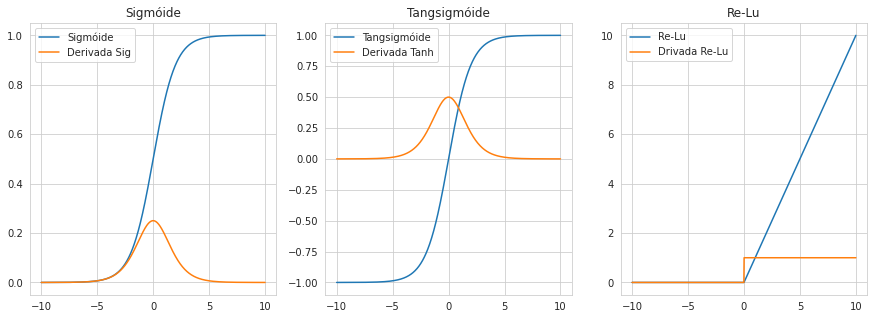

In [40]:
def sigDev(x, a=1):
    return a*sig(x,a)*(1-sig(x,a))

def tangsigDev(x, a=1):
    return (a/2)*(1-tangsig(x,a)**2)

def reluDev(x):
    return [0 if i < 0 else 1 for i in x]

derivs = {
    "Derivada Sig": sigDev(nu),
    "Derivada Tanh": tangsigDev(nu),
    "Drivada Re-Lu": reluDev(nu)
}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), facecolor='white')

for idx, (name, func) in enumerate(funcs.items()):
    axes.flatten()[idx].plot(nu, func, label=name)
    axes.flatten()[idx].set_title(name)

for idx, (name, func) in enumerate(derivs.items()):
    axes.flatten()[idx].plot(nu, func, label=name)
    axes.flatten()[idx].legend()

plt.show()